In [1]:
%load_ext dotenv
%reload_ext dotenv
%dotenv

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os
import sys
from os.path import dirname

UTILS_PATH=os.environ.get('REPO') + "/notebooks/commons"
sys.path.append(dirname(UTILS_PATH))

from commons import check_args, gen_paths, coordinates_bounds

In [4]:
def compare_box_plot(df, x, y):
    fig = plt.figure(figsize=(16, 8))

    ax = fig.add_subplot(2,1,1)
    sns.boxplot(data=df, x=x, y=y, ax=ax)

    ax = fig.add_subplot(2,1,2)
    sns.boxplot(data=df, x=x, y=y, ax=ax, showfliers=False)
    
def compare_box_vs_violin_plot(df, x, y):
    fig = plt.figure(figsize=(16, 8))

    ax = fig.add_subplot(2,1,1)
    sns.boxplot(data=df, x=x, y=y, ax=ax, showfliers=False)

    ax = fig.add_subplot(2,1,2)
    sns.violinplot(data=df, x=x, y=y, ax=ax)
    
def compare_box_dist(df, label):
    fig = plt.figure(figsize=(16, 8))

    ax = fig.add_subplot(3,1,1)
    sns.distplot(df[label])

    ax = fig.add_subplot(3,1,2)
    sns.boxplot(df[label], ax=ax)
    
    ax = fig.add_subplot(3,1,3)
    sns.boxplot(df[label], ax=ax, showfliers=False)

In [5]:
def get_normalized_price_by_max(df, price="price"):
    df = df.copy()
    
    df_prices = df[["estrato", price]].groupby("estrato").agg(lambda e: e.max())
    df_prices = df_prices.reset_index()
    df_prices.loc[:, "max_price"] = df_prices[price]
    df_prices = df_prices.drop([price], axis=1)
    
    df_estratos = pd.merge(df_prices, df)
    df_estratos.loc[:, "norm_price_by_max"] = \
        df_estratos.apply(lambda e: e[price]/e["max_price"], axis=1)
    return df_estratos

In [6]:
def upper_interquartile_distance(df):
    q1 = np.quantile(df, .25)
    q3 = np.quantile(df, .75)
    return q3 + 1.5*(q3 - q1)

def get_normalized_price_by_tipical(df, price="price"):
    df = df.copy()
    
    df_prices = df[["estrato", price]].groupby("estrato").agg(upper_interquartile_distance)
    df_prices = df_prices.reset_index()
    df_prices.loc[:, "normal_price"] = df_prices[price]
    df_prices = df_prices.drop([price], axis=1)

    df_estratos = pd.merge(df_prices, df)
    
    df_estratos = df_estratos.loc[df_estratos[price] <= df_estratos["normal_price"]]
    df_estratos.loc[:, "norm_price_by_stat"] = \
        df_estratos.apply(lambda e: e[price]/e["normal_price"], axis=1)

    return df_estratos

In [7]:
def plot_price_vs_discrete_value(df, label, showfliers=True):
    plt.figure(figsize=(16,10))
    features = ['rooms','baths','garages', "antiguedad"]
    for i,f in enumerate(features):
        plt.subplot(2,2,i+1)
        sns.boxplot(x=f ,y=label, data=df, showfliers=showfliers)
        plt.title(f'{f}')

In [8]:
def load_posts(input_path):
    df = pd.read_parquet(input_path)
    return df

In [9]:
if __name__ == "__main__":
    city = "manizales"
    property_type = "apartamentos"
    post_type = "venta"
    
    #city, property_type, post_type = check_args()
    base_path = os.environ.get('REPO')
    
    raw_path, clean_path = gen_paths(city, property_type, post_type)
    
    raw_path = base_path + raw_path
    clean_path = base_path + clean_path

In [10]:
MSG = """
Hay {} publicaciones de {} en total
"""

posts = load_posts(clean_path)
print(MSG.format(posts.shape[0], post_type))
posts.head()


Hay 3004 publicaciones de venta en total



,surface,rooms,baths,garages,price,latitude,description,longitude,location,url,admon,estrato,antiguedad,fid,city,property_type,post_type,price_m2
1,54.0,2.0,2.0,1.0,220.0,5.059000,"Apartamento ubicado cerca a Homecenter, constr...",-75.478996,Manizales La Toscana,https://www.fincaraiz.com.co/apartamento-en-ve...,0.0,4.0,1 a 8,5478594,manizales,apartamentos,venta,4.074074
2,72.0,3.0,3.0,1.0,280.0,5.043152,"Se cede apartamento 606 de la Torre 1 , 3 habi...",-75.473587,Manizales Avda Alberto Mendoza Frente a Expofe...,https://www.fincaraiz.com.co/apartamento-en-ve...,0.0,5.0,desconocido,5720132,manizales,apartamentos,venta,3.888889
3,160.0,4.0,3.0,1.0,290.0,5.050346,"Apartamento duplex, remodelado en La Camelia, ...",-75.484329,Manizales Palermo,https://www.fincaraiz.com.co/apartamento-en-ve...,300000.0,6.0,16 a 30,2870506,manizales,apartamentos,venta,1.812500
4,93.0,3.0,2.0,1.0,420.0,5.061000,"Bello y cómodo apartamento, ubicado sobre la A...",-75.490990,Manizales Av Santander,https://www.fincaraiz.com.co/apartamento-en-ve...,240000.0,6.0,1 a 8,5288572,manizales,apartamentos,venta,4.516129
6,65.0,3.0,2.0,1.0,150.0,5.064650,Inmobiliaria Giraldo Castaño ofrece apartament...,-75.507553,Manizales palonegro,https://www.fincaraiz.com.co/apartamento-en-ve...,0.0,3.0,1 a 8,5149671,manizales,apartamentos,venta,2.307692


### Distribución variables continuas

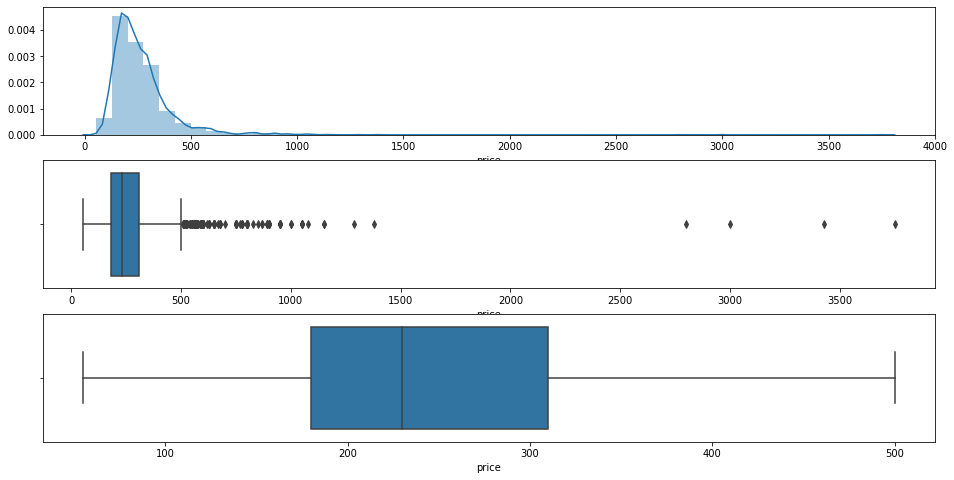

In [11]:
compare_box_dist(posts, "price")

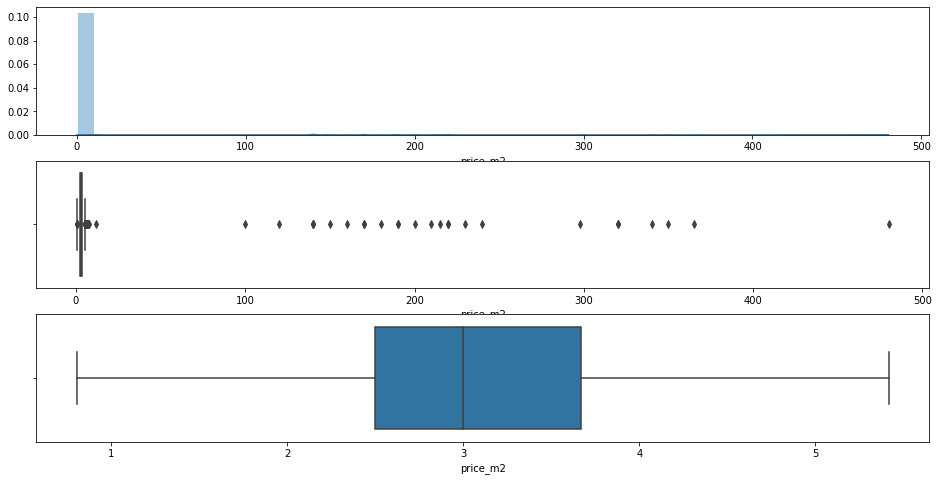

In [12]:
compare_box_dist(posts, "price_m2")

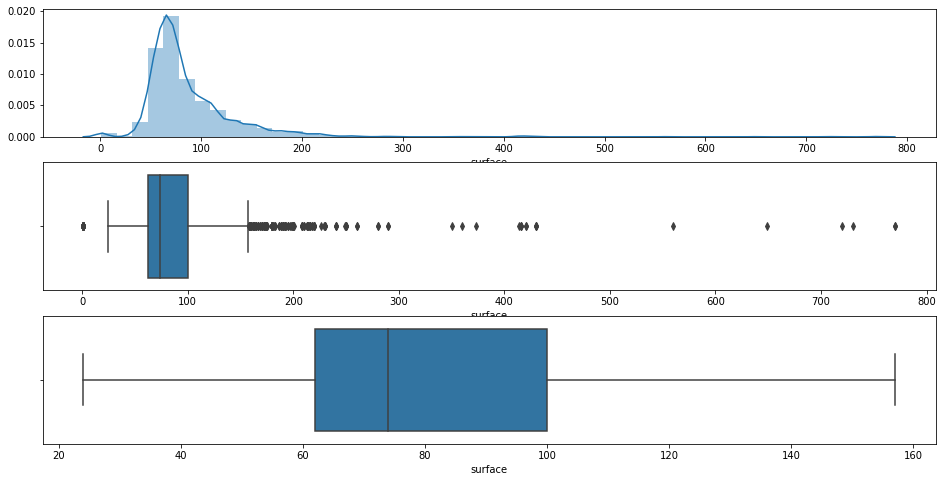

In [13]:
compare_box_dist(posts, "surface")

### Distribución precio por varibles discreta

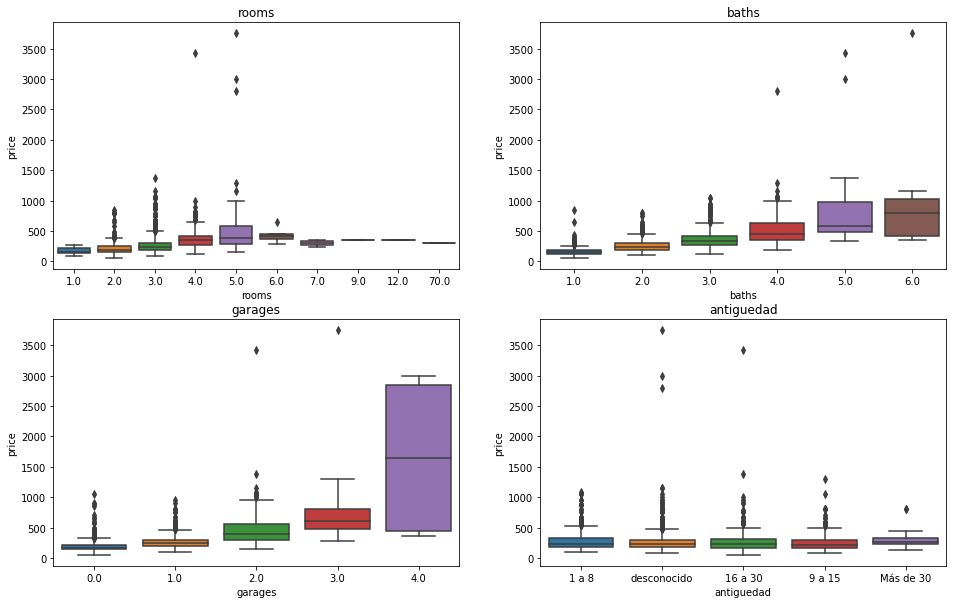

In [14]:
plot_price_vs_discrete_value(posts, "price")

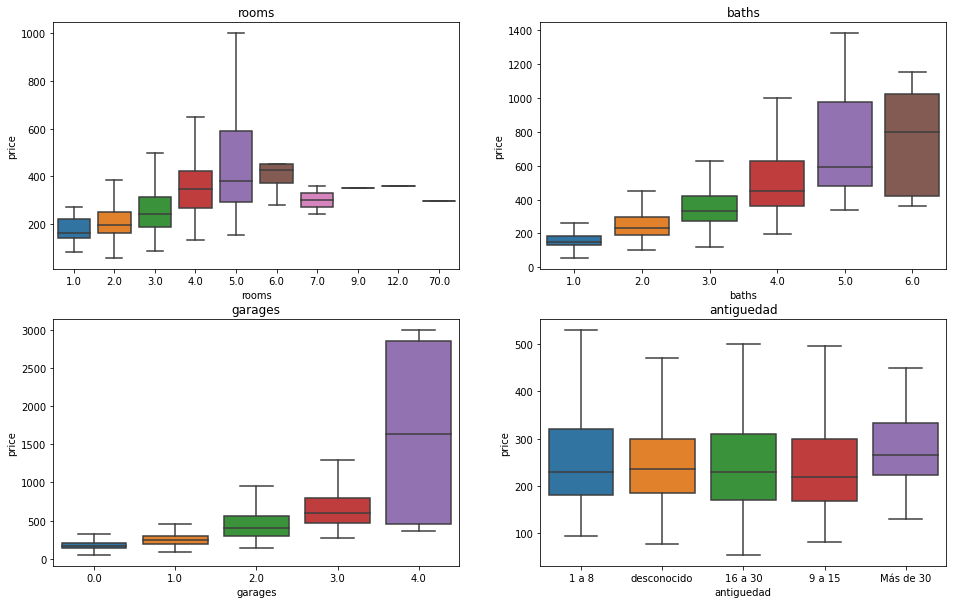

In [15]:
plot_price_vs_discrete_value(posts, "price", showfliers=False)

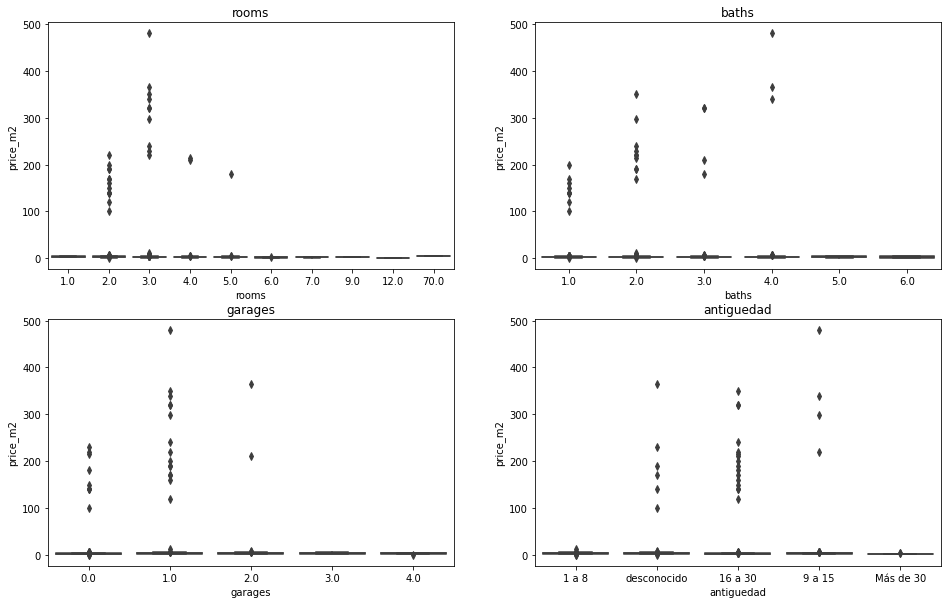

In [16]:
plot_price_vs_discrete_value(posts, "price_m2")

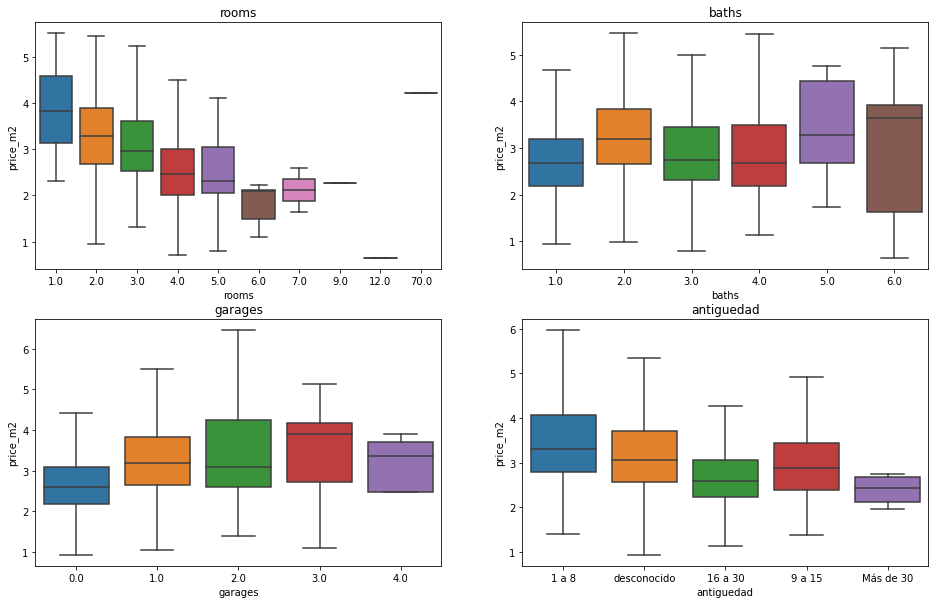

In [17]:
plot_price_vs_discrete_value(posts, "price_m2", showfliers=False)

,surface,rooms,baths,garages,price,latitude,description,longitude,location,url,admon,antiguedad,fid,city,property_type,post_type,price_m2
estrato,,,,,,,,,,,,,,,,,
1.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2.0,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
3.0,604,604,604,604,604,604,604,604,604,604,604,604,604,604,604,604,604
4.0,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829
5.0,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503,503
6.0,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032,1032


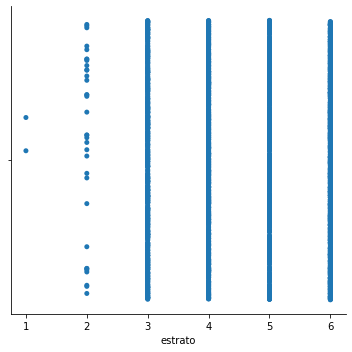

In [18]:
## Numero de muestras por estrato

sns.catplot(data=posts, x="estrato")
posts.groupby("estrato").count()

### Distribución del precio discriminado por estrato

Se verifica la forma del histograma de las variables continuas clasificadas por estrato

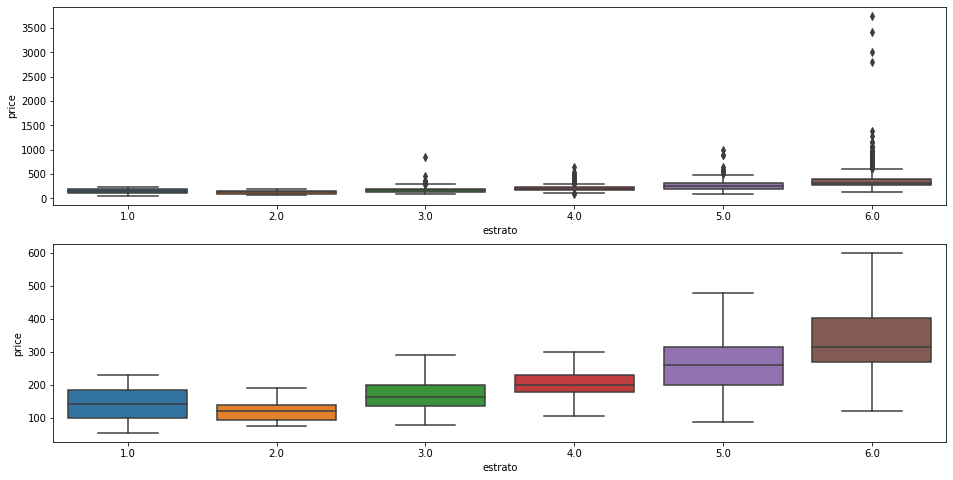

In [19]:
compare_box_plot(posts, "estrato", "price")

#### Se normalizan los precion por estrato

La idea es observar si la distribución de los precios es similar entre los estratos luego de normalizar los precios

In [20]:
normalized_price = get_normalized_price_by_max(posts)
normalized_price.head()

,estrato,max_price,surface,rooms,baths,garages,price,latitude,description,longitude,location,url,admon,antiguedad,fid,city,property_type,post_type,price_m2,norm_price_by_max
0,1.0,230.0,65.0,2.0,1.0,0.0,230.0,5.040010,"Apartamento amplio, excelente luz natural con ...",-75.479889,Manizales el trebol,https://www.fincaraiz.com.co/apartamento-en-ve...,198000.0,1 a 8,5672757,manizales,apartamentos,venta,3.538462,1.000000
1,1.0,230.0,45.0,2.0,1.0,0.0,55.0,5.058402,"DOS ALCOBAS, UN CLOSET, SALA, BAÑO, COCINA SEM...",-75.505379,Manizales SAN SEBASTIAN,https://www.fincaraiz.com.co/apartamento-en-ve...,6000.0,16 a 30,2830855,manizales,apartamentos,venta,1.222222,0.239130
2,2.0,190.0,48.0,3.0,1.0,0.0,90.0,5.062999,Apartamento de 3 alcobas sala comedor cocina b...,-75.502769,Manizales bengala,https://www.fincaraiz.com.co/apartamento-en-ve...,40000.0,9 a 15,5374011,manizales,apartamentos,venta,1.875000,0.473684
3,2.0,190.0,105.0,3.0,1.0,0.0,165.0,5.047422,"Se Vende Hermoso Apartamento, Bien Ubicado, Do...",-75.513695,Manizales Villa Maria,https://www.fincaraiz.com.co/apartamento-en-ve...,0.0,desconocido,4884798,manizales,apartamentos,venta,1.571429,0.868421
4,2.0,190.0,51.0,2.0,1.0,0.0,140.0,5.079134,"Hermoso apartamento con 2 alcobas, 1 baño, sal...",-75.526466,Manizales Villamaria,https://www.fincaraiz.com.co/apartamento-en-ve...,0.0,desconocido,4609053,manizales,apartamentos,venta,2.745098,0.736842


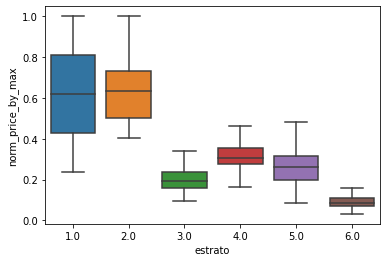

In [21]:
sns.boxplot(data=normalized_price, x="estrato", y="norm_price_by_max", showfliers=False)

#### Se normalizan los precios descartando valores atipicos

Se prueba normalizando sin los valores atipicos

In [22]:
normalized_price = get_normalized_price_by_tipical(posts)
normalized_price.head()

,estrato,normal_price,surface,rooms,baths,garages,price,latitude,description,longitude,location,url,admon,antiguedad,fid,city,property_type,post_type,price_m2,norm_price_by_stat
0,1.0,317.500,65.0,2.0,1.0,0.0,230.0,5.040010,"Apartamento amplio, excelente luz natural con ...",-75.479889,Manizales el trebol,https://www.fincaraiz.com.co/apartamento-en-ve...,198000.0,1 a 8,5672757,manizales,apartamentos,venta,3.538462,0.724409
1,1.0,317.500,45.0,2.0,1.0,0.0,55.0,5.058402,"DOS ALCOBAS, UN CLOSET, SALA, BAÑO, COCINA SEM...",-75.505379,Manizales SAN SEBASTIAN,https://www.fincaraiz.com.co/apartamento-en-ve...,6000.0,16 a 30,2830855,manizales,apartamentos,venta,1.222222,0.173228
2,2.0,205.875,48.0,3.0,1.0,0.0,90.0,5.062999,Apartamento de 3 alcobas sala comedor cocina b...,-75.502769,Manizales bengala,https://www.fincaraiz.com.co/apartamento-en-ve...,40000.0,9 a 15,5374011,manizales,apartamentos,venta,1.875000,0.437158
3,2.0,205.875,105.0,3.0,1.0,0.0,165.0,5.047422,"Se Vende Hermoso Apartamento, Bien Ubicado, Do...",-75.513695,Manizales Villa Maria,https://www.fincaraiz.com.co/apartamento-en-ve...,0.0,desconocido,4884798,manizales,apartamentos,venta,1.571429,0.801457
4,2.0,205.875,51.0,2.0,1.0,0.0,140.0,5.079134,"Hermoso apartamento con 2 alcobas, 1 baño, sal...",-75.526466,Manizales Villamaria,https://www.fincaraiz.com.co/apartamento-en-ve...,0.0,desconocido,4609053,manizales,apartamentos,venta,2.745098,0.680024


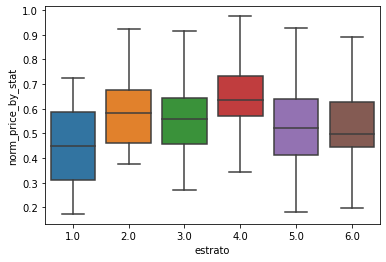

In [23]:
sns.boxplot(data=normalized_price, x="estrato", y="norm_price_by_stat", showfliers=False)

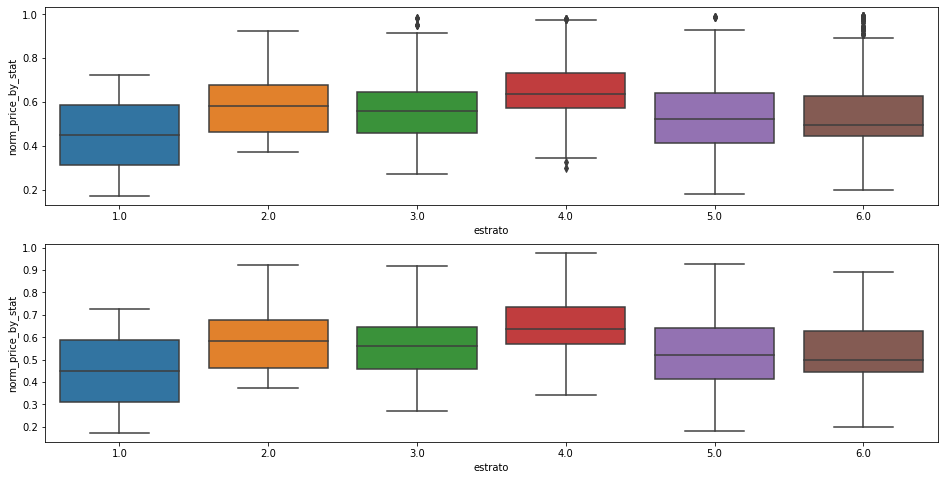

In [24]:
compare_box_plot(normalized_price, "estrato", "norm_price_by_stat")

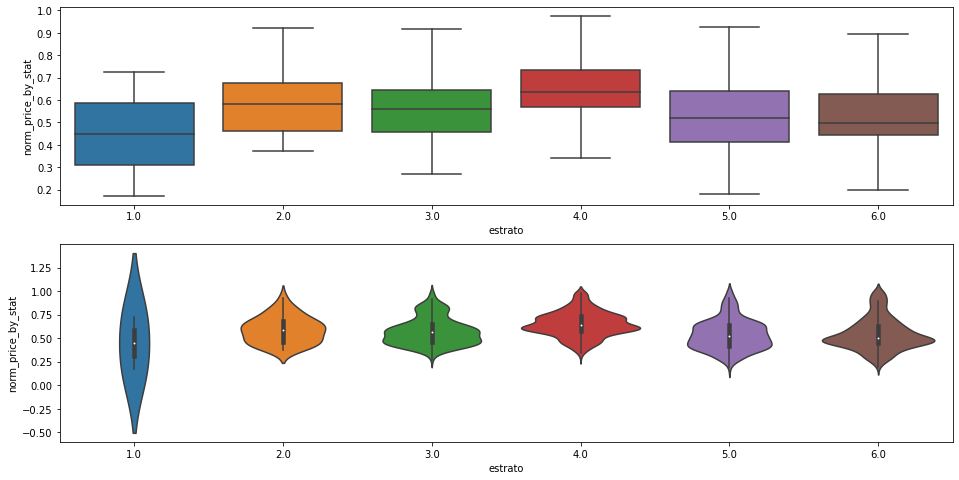

In [25]:
compare_box_vs_violin_plot(normalized_price, "estrato", "norm_price_by_stat")

### Distribución del precio del metro cuadrado discriminado por estrato

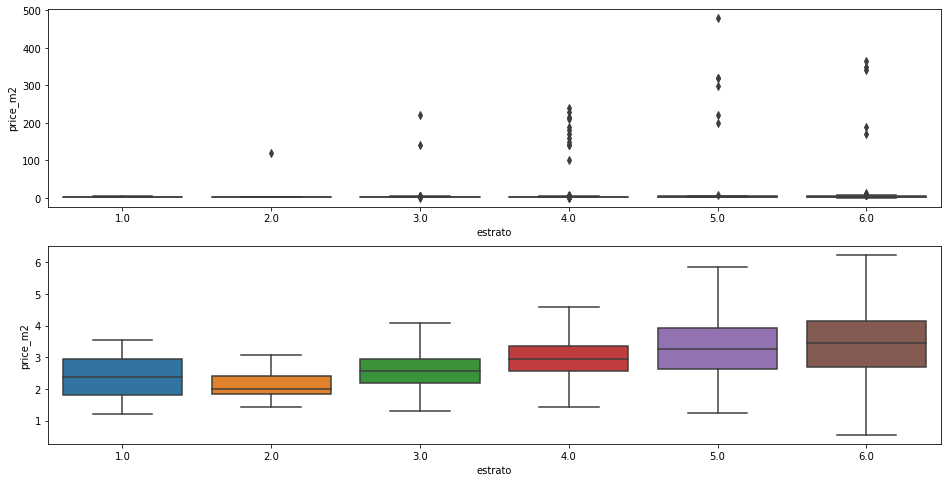

In [26]:
compare_box_plot(posts, "estrato", "price_m2")

#### Se normalizan los precion por estrato

La idea es observar si la distribución de los precios es similar entre los estratos luego de normalizar los precios

In [27]:
normalized_price_m2 = get_normalized_price_by_max(posts, price="price_m2")
normalized_price_m2.head()

,estrato,max_price,surface,rooms,baths,garages,price,latitude,description,longitude,location,url,admon,antiguedad,fid,city,property_type,post_type,price_m2,norm_price_by_max
0,1.0,3.538462,65.0,2.0,1.0,0.0,230.0,5.040010,"Apartamento amplio, excelente luz natural con ...",-75.479889,Manizales el trebol,https://www.fincaraiz.com.co/apartamento-en-ve...,198000.0,1 a 8,5672757,manizales,apartamentos,venta,3.538462,1.000000
1,1.0,3.538462,45.0,2.0,1.0,0.0,55.0,5.058402,"DOS ALCOBAS, UN CLOSET, SALA, BAÑO, COCINA SEM...",-75.505379,Manizales SAN SEBASTIAN,https://www.fincaraiz.com.co/apartamento-en-ve...,6000.0,16 a 30,2830855,manizales,apartamentos,venta,1.222222,0.345411
2,2.0,120.000000,48.0,3.0,1.0,0.0,90.0,5.062999,Apartamento de 3 alcobas sala comedor cocina b...,-75.502769,Manizales bengala,https://www.fincaraiz.com.co/apartamento-en-ve...,40000.0,9 a 15,5374011,manizales,apartamentos,venta,1.875000,0.015625
3,2.0,120.000000,105.0,3.0,1.0,0.0,165.0,5.047422,"Se Vende Hermoso Apartamento, Bien Ubicado, Do...",-75.513695,Manizales Villa Maria,https://www.fincaraiz.com.co/apartamento-en-ve...,0.0,desconocido,4884798,manizales,apartamentos,venta,1.571429,0.013095
4,2.0,120.000000,51.0,2.0,1.0,0.0,140.0,5.079134,"Hermoso apartamento con 2 alcobas, 1 baño, sal...",-75.526466,Manizales Villamaria,https://www.fincaraiz.com.co/apartamento-en-ve...,0.0,desconocido,4609053,manizales,apartamentos,venta,2.745098,0.022876


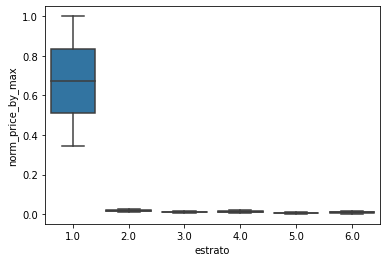

In [28]:
sns.boxplot(data=normalized_price_m2, x="estrato", y="norm_price_by_max", showfliers=False)

#### Se normalizan los precios descartando valores atipicos

Se prueba normalizando sin los valores atipicos

In [29]:
normalized_price_m2 = get_normalized_price_by_tipical(posts, price="price_m2")
normalized_price_m2.head()

,estrato,normal_price,surface,rooms,baths,garages,price,latitude,description,longitude,location,url,admon,antiguedad,fid,city,property_type,post_type,price_m2,norm_price_by_stat
0,1.0,4.696581,65.0,2.0,1.0,0.0,230.0,5.040010,"Apartamento amplio, excelente luz natural con ...",-75.479889,Manizales el trebol,https://www.fincaraiz.com.co/apartamento-en-ve...,198000.0,1 a 8,5672757,manizales,apartamentos,venta,3.538462,0.753412
1,1.0,4.696581,45.0,2.0,1.0,0.0,55.0,5.058402,"DOS ALCOBAS, UN CLOSET, SALA, BAÑO, COCINA SEM...",-75.505379,Manizales SAN SEBASTIAN,https://www.fincaraiz.com.co/apartamento-en-ve...,6000.0,16 a 30,2830855,manizales,apartamentos,venta,1.222222,0.260237
2,2.0,3.249718,48.0,3.0,1.0,0.0,90.0,5.062999,Apartamento de 3 alcobas sala comedor cocina b...,-75.502769,Manizales bengala,https://www.fincaraiz.com.co/apartamento-en-ve...,40000.0,9 a 15,5374011,manizales,apartamentos,venta,1.875000,0.576973
3,2.0,3.249718,105.0,3.0,1.0,0.0,165.0,5.047422,"Se Vende Hermoso Apartamento, Bien Ubicado, Do...",-75.513695,Manizales Villa Maria,https://www.fincaraiz.com.co/apartamento-en-ve...,0.0,desconocido,4884798,manizales,apartamentos,venta,1.571429,0.483558
4,2.0,3.249718,51.0,2.0,1.0,0.0,140.0,5.079134,"Hermoso apartamento con 2 alcobas, 1 baño, sal...",-75.526466,Manizales Villamaria,https://www.fincaraiz.com.co/apartamento-en-ve...,0.0,desconocido,4609053,manizales,apartamentos,venta,2.745098,0.844719


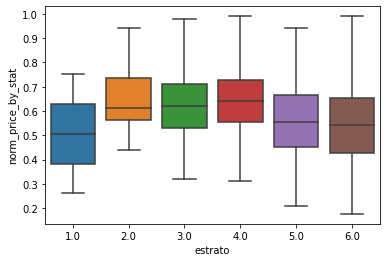

In [30]:
sns.boxplot(data=normalized_price_m2, x="estrato", y="norm_price_by_stat", showfliers=False)

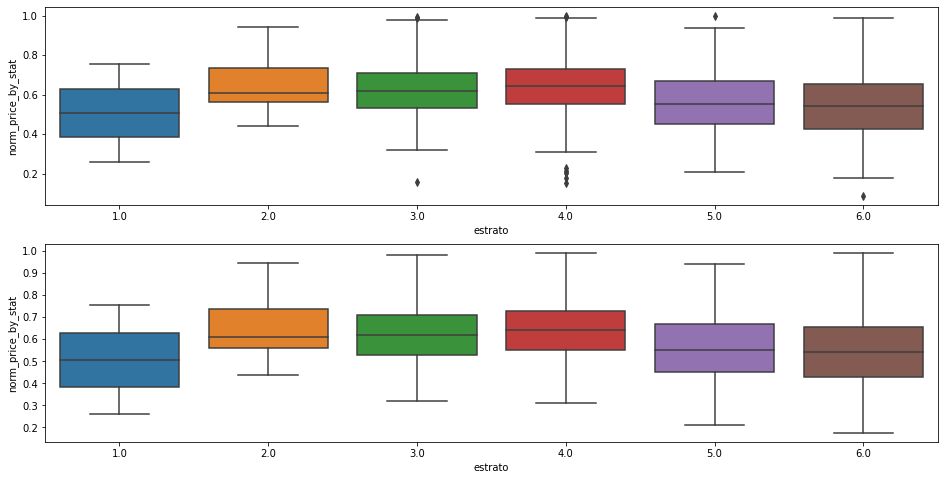

In [31]:
compare_box_plot(normalized_price_m2, "estrato", "norm_price_by_stat")

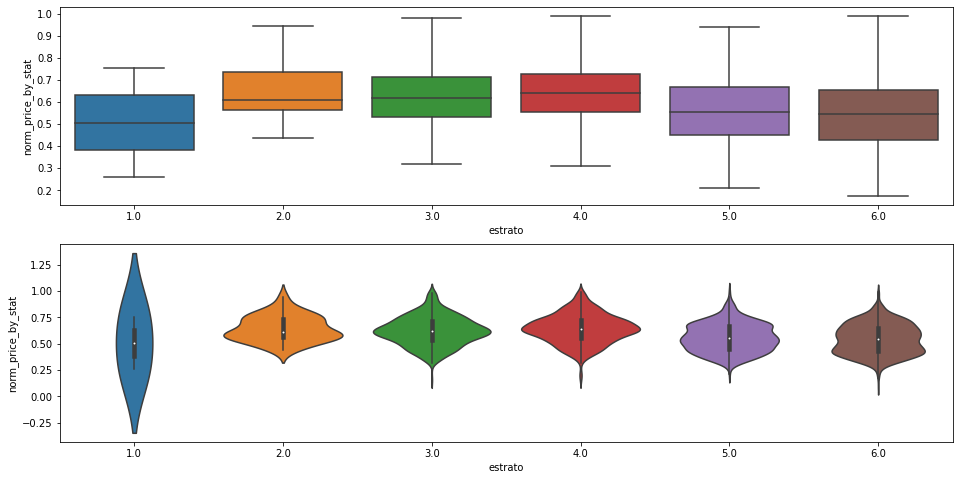

In [32]:
compare_box_vs_violin_plot(normalized_price_m2, "estrato", "norm_price_by_stat")